<a href="https://colab.research.google.com/github/Jesus-Vazquez-A/Ejercicios-blog/blob/main/Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import libraries**

In [15]:
import pandas as pd # Data manipulation
import numpy as np # Linear algebra
import warnings # Ignore warnings

In [2]:
warnings.filterwarnings("ignore")

### **Load Data**

In [4]:
df=pd.read_csv("/content/insurance.csv")

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### **Unique Values**

In [6]:
{col:list(df[col].unique()) for col in df.select_dtypes("object")}

{'region': ['southwest', 'southeast', 'northwest', 'northeast'],
 'sex': ['female', 'male'],
 'smoker': ['yes', 'no']}

In [19]:
from plotnine import *

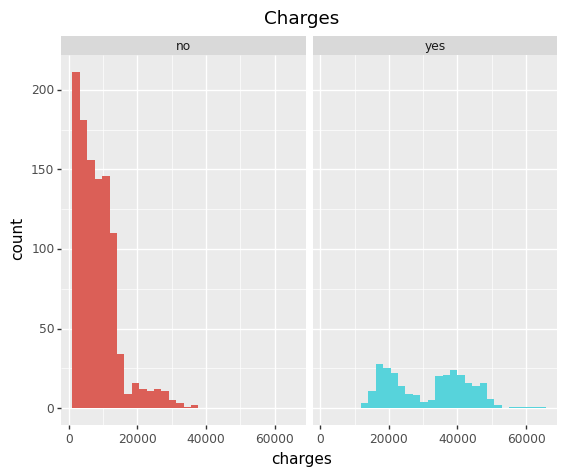

<ggplot: (8773669418109)>

In [40]:

from plotnine.scales.scale_manual import scale_color_manual
from plotnine.themes import theme
from plotnine.facets import facet_wrap


(
    ggplot(df)  
    + aes(x="charges",fill="smoker")  
    + geom_histogram() + labs(title="Charges") 
    + facet_wrap("smoker")
    + theme(legend_position="none") 
  

)


In [ ]:
df["rent amount (R$)"]=df["rent amount (R$)"].apply(lambda x: 18000 if x > 18000 else x)

In [ ]:
df["rent amount (R$)"]=df["rent amount (R$)"].apply(np.log)

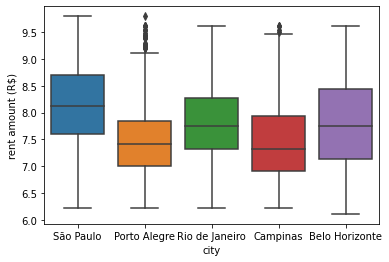

In [ ]:
sns.boxplot(df["city"],df["rent amount (R$)"])

In [ ]:
porto_alegre=df.query("city=='Porto Alegre'")
campinas=df.query("city=='Campinas'")
other_citys=df.query("city!='Porto Alegre' and city!='Campinas'")

In [ ]:
porto_alegre["rent amount (R$)"]=porto_alegre["rent amount (R$)"].apply(lambda x: 9.0 if x > 9.0 else x)
campinas["rent amount (R$)"]=campinas["rent amount (R$)"].apply(lambda x: 9.2 if x > 9.2 else x)

In [ ]:
df=pd.concat([porto_alegre,campinas,other_citys])

In [ ]:
df["area"]=df["area"].apply(lambda x: 1000 if x > 1000 else x)

In [ ]:
df["area"]=df["area"].apply(np.log)

In [ ]:
df["fire insurance (R$)"]=df["fire insurance (R$)"].apply(lambda x: 250 if x > 250 else x)

In [ ]:
df["fire insurance (R$)"]=df["fire insurance (R$)"].apply(lambda x: 5 if x < 5 else x)

In [ ]:
df["fire insurance (R$)"]=df["fire insurance (R$)"].apply(np.log)

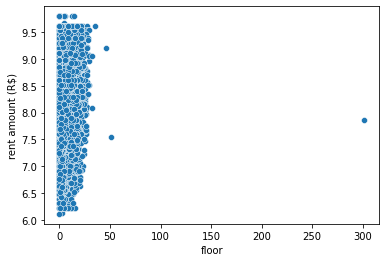

In [ ]:
sns.scatterplot(df["floor"],df["rent amount (R$)"])

In [ ]:
df["floor"]=df["floor"].apply(lambda x: 0 if x =="-" else x)
df["floor"]=df["floor"].astype(int)

In [ ]:
df["rooms"]=df["rooms"].apply(lambda x: 8 if x >8 else 8)
df["bathroom"]=df["bathroom"].apply(lambda x: 8 if x >8 else 8)
df["parking spaces"]=df["parking spaces"].apply(lambda x: 8 if x >8 else 8)
df["floor"]=df["floor"].apply(lambda x: 30 if x > 30 else x)

In [ ]:
df["animal"]=df["animal"].apply(lambda x: 1 if x=="acept" else 0)
df["furniture"]=df["furniture"].apply(lambda x: 1 if x=="furnished" else 0)

In [ ]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'rent amount (R$)', 'fire insurance (R$)'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.compose import make_column_transformer

In [ ]:
tf_col=make_column_transformer((MinMaxScaler(),["rooms","bathroom","parking spaces","floor"]),
                        (OneHotEncoder(),["city"]))

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score

In [ ]:
X=df.drop(["rent amount (R$)"],axis="columns")
y=df["rent amount (R$)"]

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [ ]:
pipe=Pipeline([("Preprocesor",tf_col),("lm",LinearRegression())])

In [ ]:
pipe.fit(X_train,Y_train)

Pipeline(steps=[('Preprocesor',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['rooms', 'bathroom',
                                                   'parking spaces', 'floor']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['city'])])),
                ('lm', LinearRegression())])

In [ ]:
X_train

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,fire insurance (R$)
1277,São Paulo,4.787492,8,8,8,0,1,0,3.828641
4537,Porto Alegre,3.828641,8,8,8,1,1,0,2.944439
1272,São Paulo,3.688879,8,8,8,8,0,0,3.091042
10572,Campinas,4.442651,8,8,8,0,1,0,2.197225
454,Porto Alegre,4.248495,8,8,8,6,1,0,3.332205
...,...,...,...,...,...,...,...,...,...
8871,São Paulo,6.390241,8,8,8,0,1,1,5.420535
3494,São Paulo,6.214608,8,8,8,0,1,0,5.153292
1502,Rio de Janeiro,4.406719,8,8,8,4,1,0,3.367296
9650,São Paulo,5.247024,8,8,8,0,1,1,4.219508
